## Problem 1A :

##### Salary is hypothesized to depend on educational qualification and occupation. To understand the dependency, the salaries of 40 individuals are collected and each person’s educational qualification and occupation are noted. Educational qualification is at three levels, High school graduate, Bachelor, and Doctorate. Occupation is at four levels, Administrative and clerical, Sales, Professional or specialty, and Executive or managerial. A different number of observations are in each level of education – occupation combination.

###### [Assume that the data follows a normal distribution. In reality, the normality assumption may not always hold if the sample size is small.]



In [48]:
# Importing Libraries

import numpy as np
import pandas as pd
from scipy.stats import zscore
import matplotlib.pyplot as plt 
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA
%matplotlib inline
import seaborn as sns

##### <span style="color:red">1. State the null and the alternate hypothesis for conducting one-way ANOVA for both Education and Occupation individually.</span>

In [49]:
SalaryData = pd.read_csv('SalaryData.csv')
SalaryData

Education        Occupation  Salary
0    Doctorate      Adm-clerical  153197
1    Doctorate      Adm-clerical  115945
2    Doctorate      Adm-clerical  175935
3    Doctorate      Adm-clerical  220754
4    Doctorate             Sales  170769
5    Doctorate             Sales  219420
6    Doctorate             Sales  237920
7    Doctorate             Sales  160540
8    Doctorate             Sales  180934
9    Doctorate    Prof-specialty  248156
10   Doctorate    Prof-specialty  247724
11   Doctorate    Prof-specialty  249207
12   Doctorate    Prof-specialty  235334
13   Doctorate    Prof-specialty  248871
14   Doctorate    Prof-specialty  257345
15   Bachelors      Adm-clerical  160910
16   Bachelors      Adm-clerical  162494
17   Bachelors      Adm-clerical  188729
18   Bachelors    Prof-specialty   99185
19   Bachelors    Prof-specialty   90135
20   Bachelors    Prof-specialty  100135
21   Bachelors    Prof-specialty  133696
22   Bachelors             Sales  149909
23   Bachelors             Sales  191712
24   Bachelors             Sales  167431
25   Bachelors             Sales  260151
26     HS-grad             Sales   50103
27     HS-grad             Sales   50122
28     HS-grad             Sales   52242
29     HS-grad      Adm-clerical   75333
30     HS-grad      Adm-clerical   77743
31     HS-grad      Adm-clerical   83203
32     HS-grad    Prof-specialty   90456
33     HS-grad    Prof-specialty  100678
34     HS-grad    Prof-specialty   95469
35   Bachelors   Exec-managerial  173935
36   Bachelors   Exec-managerial  212448
37   Bachelors   Exec-managerial  173664
38   Bachelors   Exec-managerial  212760
39   Doctorate   Exec-managerial  212781

##### Formulation of hypothesis for conducting one-way ANOVA for education qualification w.r.t salary
#####  H0: Salary depend on education qualification
#####  Ha: Salary does not depend on education
#####  Confidence level = 0.05
##### Formulation of hypothesis for conducting one-way ANOVA for occupation w.r.t salary
#####  H0: Salary depend on occupation
#####  Ha: Salary does not depend on occupation
#####  Confidence level = 0.05

##### <span style="color:red">2. Perform a one-way ANOVA on Salary with respect to Education. State whether the null hypothesis is accepted or rejected based on the ANOVA results.</span>

In [52]:
formula = 'Salary ~ C(Education)'
model = ols(formula, SalaryData).fit()
aov_table = anova_lm(model)
print(aov_table)

                df        sum_sq       mean_sq         F        PR(>F)
C(Education)   2.0  1.026955e+11  5.134773e+10  30.95628  1.257709e-08
Residual      37.0  6.137256e+10  1.658718e+09       NaN           NaN


##### From the above table, we find that the P value is less than 0.05, hence we reject the null hypothesis.

##### <span style="color:red">3. Perform a one-way ANOVA on Salary with respect to Occupation. State whether the null hypothesis is accepted or rejected based on the ANOVA results.</span>

In [54]:
formula = 'Salary ~ C(Occupation)'
model = ols(formula, SalaryData).fit()
aov_table = anova_lm(model)
print(aov_table)

                 df        sum_sq       mean_sq         F    PR(>F)
C(Occupation)   3.0  1.125878e+10  3.752928e+09  0.884144  0.458508
Residual       36.0  1.528092e+11  4.244701e+09       NaN       NaN


##### From the above table, we find that the P value is greater than 0.05, hence we do not reject the null hypothesis.

##### <span style="color:red">4. If the null hypothesis is rejected in either (2) or in (3), find out which class means are significantly different. Interpret the result. (Non-Graded)</span>

##### In terms of Education , P value is less than 0.05 , So we rejected the null hypothesis & similarly in case of Occupation , P value is higher than 0.05 , hence we cant reject the null hypothesis . 

## Problem 1B :

##### <span style="color:red">1.  What is the interaction between two treatments? Analyze the effects of one variable on the other (Education and Occupation) with the help of an interaction plot.[hint: use the ‘pointplot’ function from the ‘seaborn’ function]</span>

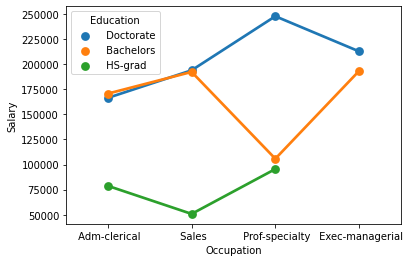

In [57]:
sns.pointplot(x='Occupation',y='Salary',data=SalaryData,hue='Education',ci=None);

##### Adm-clerical and sales professionals with bachelors and doctorate degrees earn almost similar salary packages.

##### <span style="color:red">2.  Perform a two-way ANOVA based on Salary with respect to both Education and Occupation (along with their interaction Education*Occupation). State the null and alternative hypotheses and state your results. How will you interpret this result?</span>

##### Formulation of hypothesis for conducting two-way ANOVA based on education and occupation w.r.t salary.
#####  H0: Salary depends on both categories - education and occupation
#####  Ha: Salary does not depend on at least one of the categories - education and occupation
#####  Confidence level = 0.05

In [59]:
formula = 'Salary ~ C(Education) + C(Occupation) + C(Education):C(Occupation)'
model = ols(formula, SalaryData).fit()
aov_table = anova_lm(model)
print(aov_table)

                              df        sum_sq       mean_sq          F  \
C(Education)                 2.0  1.026955e+11  5.134773e+10  72.211958   
C(Occupation)                3.0  5.519946e+09  1.839982e+09   2.587626   
C(Education):C(Occupation)   6.0  3.634909e+10  6.058182e+09   8.519815   
Residual                    29.0  2.062102e+10  7.110697e+08        NaN   

                                  PR(>F)  
C(Education)                5.466264e-12  
C(Occupation)               7.211580e-02  
C(Education):C(Occupation)  2.232500e-05  
Residual                             NaN  


##### Considering both education and occupation, education is a significant factor as the P value is <0.05 ,Hence we reject the null hypothesis based on education, whereas occupation is not a significant variable as P value of it is >0.05 , So we do not reject null hypothesis.

##### if we look at the interaction between Education & Occupation , in this case P value < 0.05 , Hence we reject null hypothesis . We can understand the interaction b/w Education & occupation playing a major role interms of deciding the hypothesis . 

##### <span style="color:red">3.  Explain the business implications of performing ANOVA for this particular case study.</span>

##### By performing ANOVA on the given data set, we can conclude that salary is dependent on occupation.

## Problem 2 :

##### The dataset Education - Post 12th Standard.csv contains information on various colleges. You are expected to do a Principal Component Analysis for this case study according to the instructions given. The data dictionary of the 'Education - Post 12th Standard.csv' can be found in the following file: Data Dictionary.xlsx.

In [4]:
# Reading the dataset
Educationdata = pd.read_csv('Education+-+Post+12th+Standard.csv')
Educationdata.head()

Names  Apps  Accept  Enroll  Top10perc  Top25perc  \
0  Abilene Christian University  1660    1232     721         23         52   
1            Adelphi University  2186    1924     512         16         29   
2                Adrian College  1428    1097     336         22         50   
3           Agnes Scott College   417     349     137         60         89   
4     Alaska Pacific University   193     146      55         16         44   

   F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  \
0         2885          537      7440        3300    450      2200   70   
1         2683         1227     12280        6450    750      1500   29   
2         1036           99     11250        3750    400      1165   53   
3          510           63     12960        5450    450       875   92   
4          249          869      7560        4120    800      1500   76   

   Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0        78       18.1           12    7041         60  
1        30       12.2           16   10527         56  
2        66       12.9           30    8735         54  
3        97        7.7           37   19016         59  
4        72       11.9            2   10922         15

In [5]:
# Descriptive statistics to summarize the data
Educationdata.describe().T

count          mean          std     min     25%     50%  \
Apps         777.0   3001.638353  3870.201484    81.0   776.0  1558.0   
Accept       777.0   2018.804376  2451.113971    72.0   604.0  1110.0   
Enroll       777.0    779.972973   929.176190    35.0   242.0   434.0   
Top10perc    777.0     27.558559    17.640364     1.0    15.0    23.0   
Top25perc    777.0     55.796654    19.804778     9.0    41.0    54.0   
F.Undergrad  777.0   3699.907336  4850.420531   139.0   992.0  1707.0   
P.Undergrad  777.0    855.298584  1522.431887     1.0    95.0   353.0   
Outstate     777.0  10440.669241  4023.016484  2340.0  7320.0  9990.0   
Room.Board   777.0   4357.526384  1096.696416  1780.0  3597.0  4200.0   
Books        777.0    549.380952   165.105360    96.0   470.0   500.0   
Personal     777.0   1340.642214   677.071454   250.0   850.0  1200.0   
PhD          777.0     72.660232    16.328155     8.0    62.0    75.0   
Terminal     777.0     79.702703    14.722359    24.0    71.0    82.0   
S.F.Ratio    777.0     14.089704     3.958349     2.5    11.5    13.6   
perc.alumni  777.0     22.743887    12.391801     0.0    13.0    21.0   
Expend       777.0   9660.171171  5221.768440  3186.0  6751.0  8377.0   
Grad.Rate    777.0     65.463320    17.177710    10.0    53.0    65.0   

                 75%      max  
Apps          3624.0  48094.0  
Accept        2424.0  26330.0  
Enroll         902.0   6392.0  
Top10perc       35.0     96.0  
Top25perc       69.0    100.0  
F.Undergrad   4005.0  31643.0  
P.Undergrad    967.0  21836.0  
Outstate     12925.0  21700.0  
Room.Board    5050.0   8124.0  
Books          600.0   2340.0  
Personal      1700.0   6800.0  
PhD             85.0    103.0  
Terminal        92.0    100.0  
S.F.Ratio       16.5     39.8  
perc.alumni     31.0     64.0  
Expend       10830.0  56233.0  
Grad.Rate       78.0    118.0

In [6]:
# Information of the data
Educationdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Names        777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

In [7]:
# Shape of the data (No. of Row's & Column's)
Educationdata.shape

(777, 18)

In [8]:
# Checking for null values (if it is there)
Educationdata.isnull().values.any()

False

In [9]:
# Checking for duplicate data 
duplicate = Educationdata.duplicated()
duplicate.sum()

0

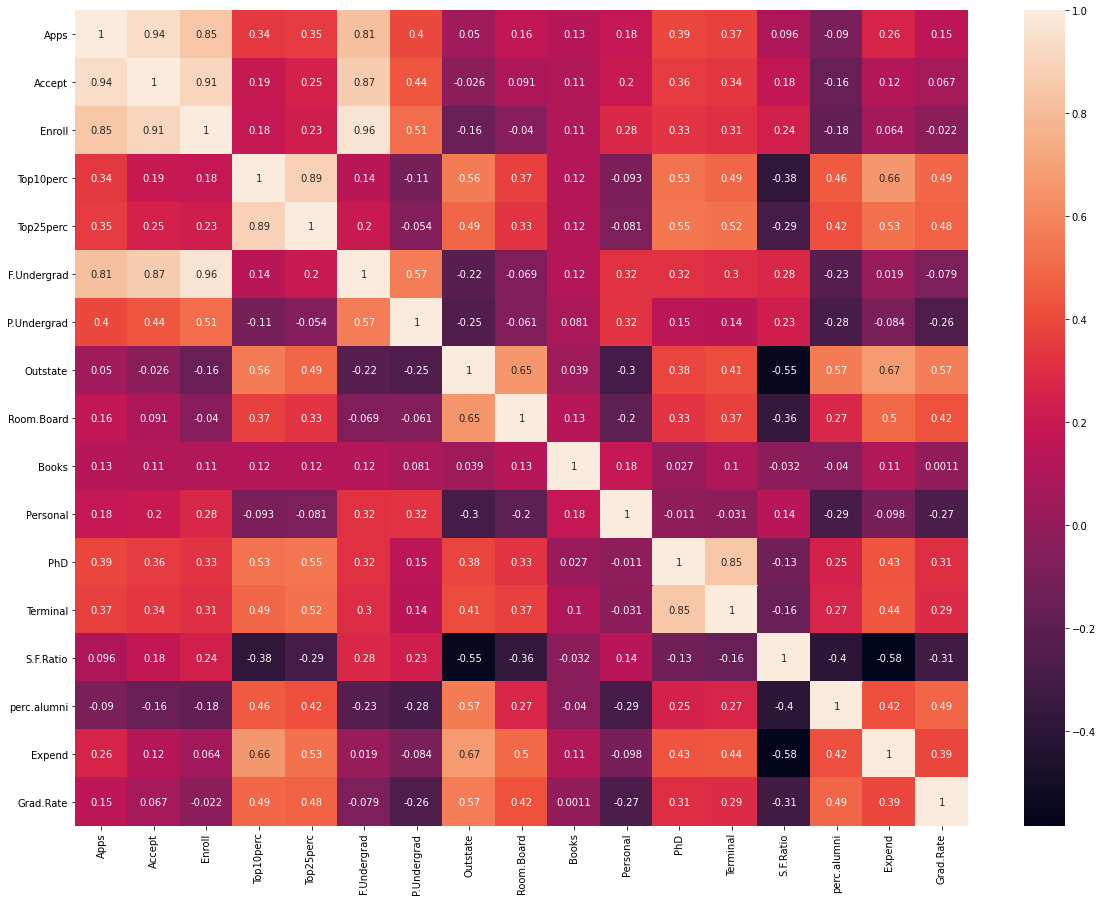

In [10]:
# Checking the correlations with the help of Heatmap
plt.subplots(figsize=(20,15))
sns.heatmap(Educationdata.corr(),annot=True);

Observation from the initial analysis:
1. Data consists of 777 university / college information with 18 features.
2. There are no missing values in the data set.
3. Names of various university and colleges is the only column with categorical field.
4. 17 other columns are numerical fields.
5. Almost for all columns there are difference in mean and median values.which shows data set has some skewness.
6. Data set has outliers.

##### <span style="color:red">2.1  Perform Exploratory Data Analysis [both univariate and multivariate analysis to be performed]. What insight do you draw from the EDA?</span>

#### Univariate Analysis 

##### To determine the Univariate Analysis we can only include the numeric columns , here in this dataset we have only one column which is categoric and we can ignore the same here  

In [11]:
Educationdata_numeric = Educationdata.select_dtypes(include=['float64','int64'])
Numeric_columns = list(Educationdata_numeric.columns.values)
len(Numeric_columns)

17

In [12]:
# Projecting all the numeric columns 
Numeric_columns 

['Apps',
 'Accept',
 'Enroll',
 'Top10perc',
 'Top25perc',
 'F.Undergrad',
 'P.Undergrad',
 'Outstate',
 'Room.Board',
 'Books',
 'Personal',
 'PhD',
 'Terminal',
 'S.F.Ratio',
 'perc.alumni',
 'Expend',
 'Grad.Rate']

In [13]:
# Defining a method for Univariate Analysis 

def univariateAnalysis(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(Educationdata[column].describe(),end=' ')
    print("\n----------------------------------------------------------------------------")
    
    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(Educationdata[column], kde=False, color='g');
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=Educationdata[column])
    plt.show()

Description of Apps
----------------------------------------------------------------------------
count      777.000000
mean      3001.638353
std       3870.201484
min         81.000000
25%        776.000000
50%       1558.000000
75%       3624.000000
max      48094.000000
Name: Apps, dtype: float64 
----------------------------------------------------------------------------
Distribution of Apps
----------------------------------------------------------------------------


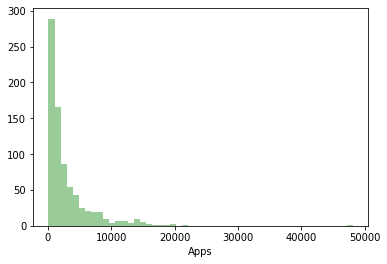

BoxPlot of Apps
----------------------------------------------------------------------------


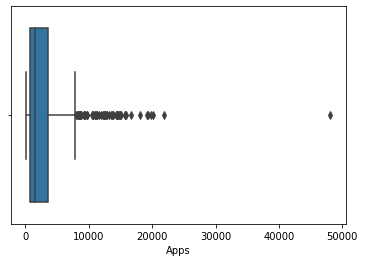

Description of Accept
----------------------------------------------------------------------------
count      777.000000
mean      2018.804376
std       2451.113971
min         72.000000
25%        604.000000
50%       1110.000000
75%       2424.000000
max      26330.000000
Name: Accept, dtype: float64 
----------------------------------------------------------------------------
Distribution of Accept
----------------------------------------------------------------------------


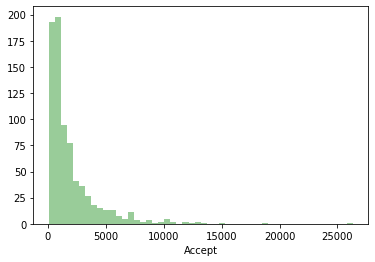

BoxPlot of Accept
----------------------------------------------------------------------------


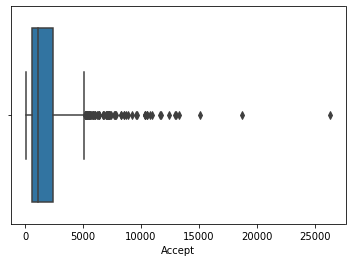

Description of Enroll
----------------------------------------------------------------------------
count     777.000000
mean      779.972973
std       929.176190
min        35.000000
25%       242.000000
50%       434.000000
75%       902.000000
max      6392.000000
Name: Enroll, dtype: float64 
----------------------------------------------------------------------------
Distribution of Enroll
----------------------------------------------------------------------------


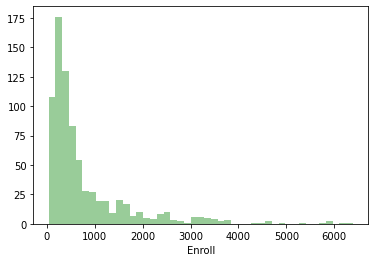

BoxPlot of Enroll
----------------------------------------------------------------------------


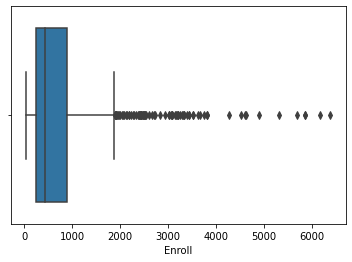

Description of Top10perc
----------------------------------------------------------------------------
count    777.000000
mean      27.558559
std       17.640364
min        1.000000
25%       15.000000
50%       23.000000
75%       35.000000
max       96.000000
Name: Top10perc, dtype: float64 
----------------------------------------------------------------------------
Distribution of Top10perc
----------------------------------------------------------------------------


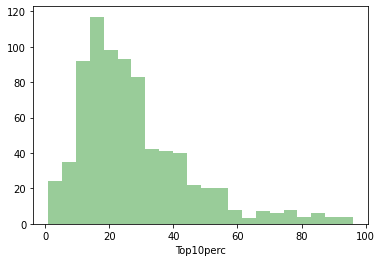

BoxPlot of Top10perc
----------------------------------------------------------------------------


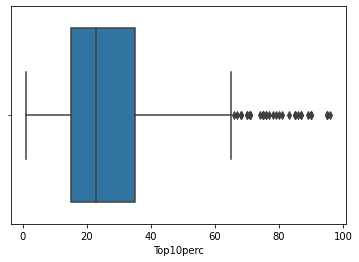

Description of Top25perc
----------------------------------------------------------------------------
count    777.000000
mean      55.796654
std       19.804778
min        9.000000
25%       41.000000
50%       54.000000
75%       69.000000
max      100.000000
Name: Top25perc, dtype: float64 
----------------------------------------------------------------------------
Distribution of Top25perc
----------------------------------------------------------------------------


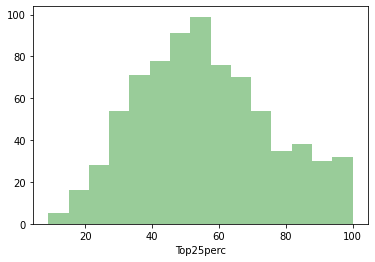

BoxPlot of Top25perc
----------------------------------------------------------------------------


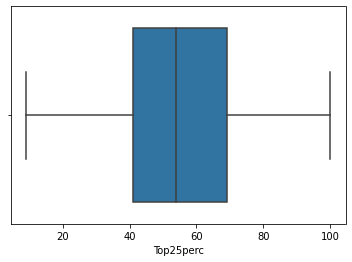

Description of F.Undergrad
----------------------------------------------------------------------------
count      777.000000
mean      3699.907336
std       4850.420531
min        139.000000
25%        992.000000
50%       1707.000000
75%       4005.000000
max      31643.000000
Name: F.Undergrad, dtype: float64 
----------------------------------------------------------------------------
Distribution of F.Undergrad
----------------------------------------------------------------------------


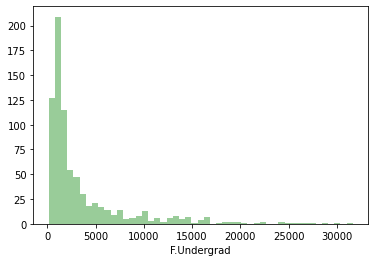

BoxPlot of F.Undergrad
----------------------------------------------------------------------------


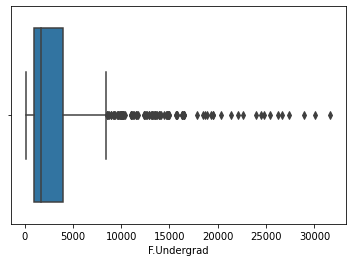

Description of P.Undergrad
----------------------------------------------------------------------------
count      777.000000
mean       855.298584
std       1522.431887
min          1.000000
25%         95.000000
50%        353.000000
75%        967.000000
max      21836.000000
Name: P.Undergrad, dtype: float64 
----------------------------------------------------------------------------
Distribution of P.Undergrad
----------------------------------------------------------------------------


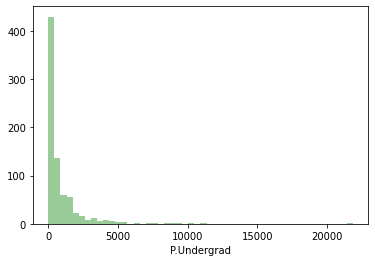

BoxPlot of P.Undergrad
----------------------------------------------------------------------------


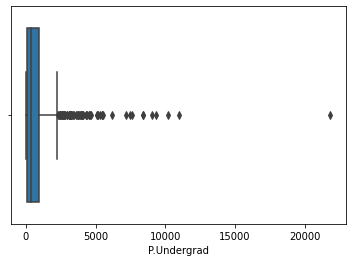

Description of Outstate
----------------------------------------------------------------------------
count      777.000000
mean     10440.669241
std       4023.016484
min       2340.000000
25%       7320.000000
50%       9990.000000
75%      12925.000000
max      21700.000000
Name: Outstate, dtype: float64 
----------------------------------------------------------------------------
Distribution of Outstate
----------------------------------------------------------------------------


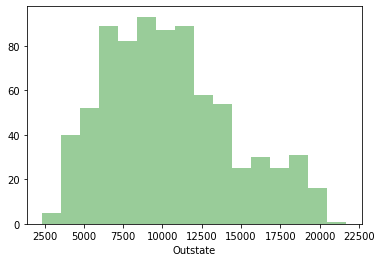

BoxPlot of Outstate
----------------------------------------------------------------------------


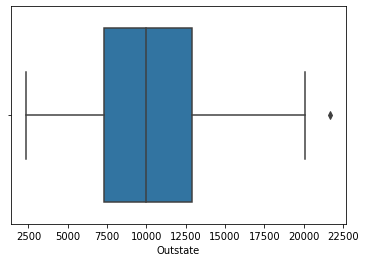

Description of Room.Board
----------------------------------------------------------------------------
count     777.000000
mean     4357.526384
std      1096.696416
min      1780.000000
25%      3597.000000
50%      4200.000000
75%      5050.000000
max      8124.000000
Name: Room.Board, dtype: float64 
----------------------------------------------------------------------------
Distribution of Room.Board
----------------------------------------------------------------------------


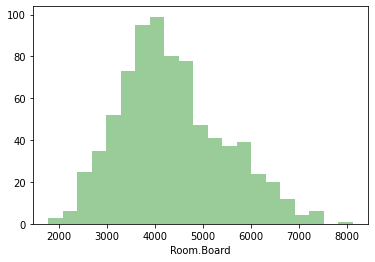

BoxPlot of Room.Board
----------------------------------------------------------------------------


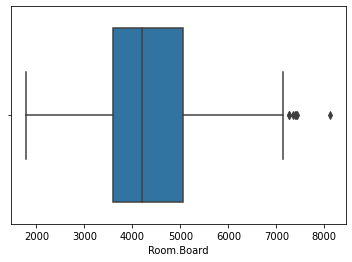

Description of Books
----------------------------------------------------------------------------
count     777.000000
mean      549.380952
std       165.105360
min        96.000000
25%       470.000000
50%       500.000000
75%       600.000000
max      2340.000000
Name: Books, dtype: float64 
----------------------------------------------------------------------------
Distribution of Books
----------------------------------------------------------------------------


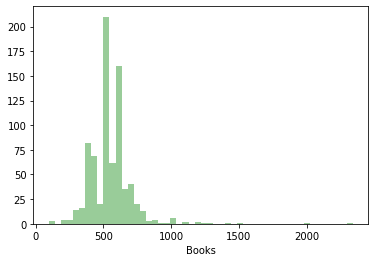

BoxPlot of Books
----------------------------------------------------------------------------


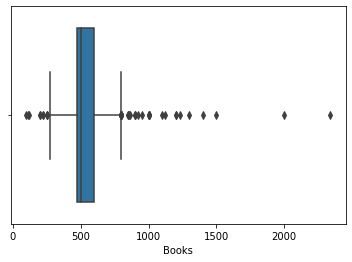

Description of Personal
----------------------------------------------------------------------------
count     777.000000
mean     1340.642214
std       677.071454
min       250.000000
25%       850.000000
50%      1200.000000
75%      1700.000000
max      6800.000000
Name: Personal, dtype: float64 
----------------------------------------------------------------------------
Distribution of Personal
----------------------------------------------------------------------------


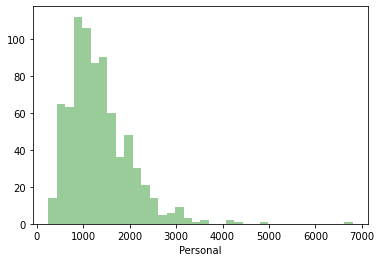

BoxPlot of Personal
----------------------------------------------------------------------------


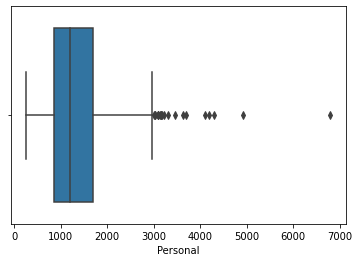

Description of PhD
----------------------------------------------------------------------------
count    777.000000
mean      72.660232
std       16.328155
min        8.000000
25%       62.000000
50%       75.000000
75%       85.000000
max      103.000000
Name: PhD, dtype: float64 
----------------------------------------------------------------------------
Distribution of PhD
----------------------------------------------------------------------------


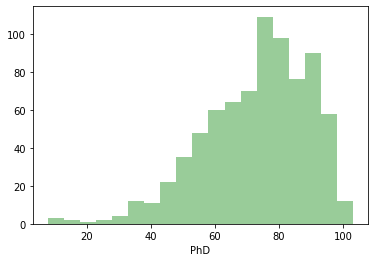

BoxPlot of PhD
----------------------------------------------------------------------------


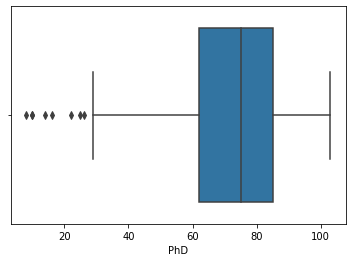

Description of Terminal
----------------------------------------------------------------------------
count    777.000000
mean      79.702703
std       14.722359
min       24.000000
25%       71.000000
50%       82.000000
75%       92.000000
max      100.000000
Name: Terminal, dtype: float64 
----------------------------------------------------------------------------
Distribution of Terminal
----------------------------------------------------------------------------


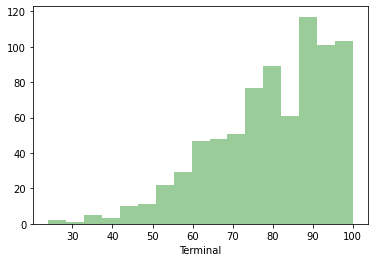

BoxPlot of Terminal
----------------------------------------------------------------------------


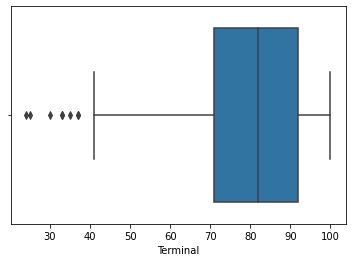

Description of S.F.Ratio
----------------------------------------------------------------------------
count    777.000000
mean      14.089704
std        3.958349
min        2.500000
25%       11.500000
50%       13.600000
75%       16.500000
max       39.800000
Name: S.F.Ratio, dtype: float64 
----------------------------------------------------------------------------
Distribution of S.F.Ratio
----------------------------------------------------------------------------


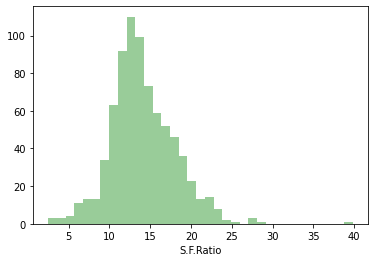

BoxPlot of S.F.Ratio
----------------------------------------------------------------------------


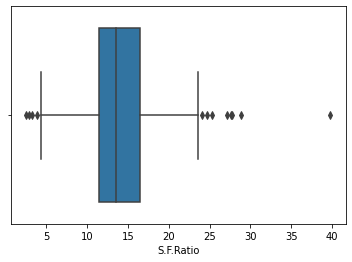

Description of perc.alumni
----------------------------------------------------------------------------
count    777.000000
mean      22.743887
std       12.391801
min        0.000000
25%       13.000000
50%       21.000000
75%       31.000000
max       64.000000
Name: perc.alumni, dtype: float64 
----------------------------------------------------------------------------
Distribution of perc.alumni
----------------------------------------------------------------------------


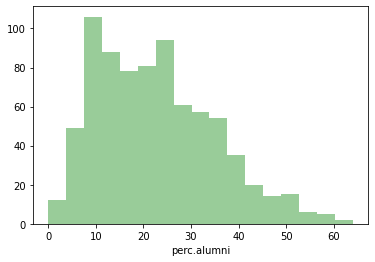

BoxPlot of perc.alumni
----------------------------------------------------------------------------


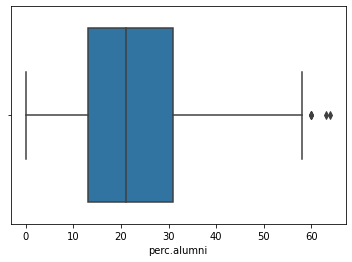

Description of Expend
----------------------------------------------------------------------------
count      777.000000
mean      9660.171171
std       5221.768440
min       3186.000000
25%       6751.000000
50%       8377.000000
75%      10830.000000
max      56233.000000
Name: Expend, dtype: float64 
----------------------------------------------------------------------------
Distribution of Expend
----------------------------------------------------------------------------


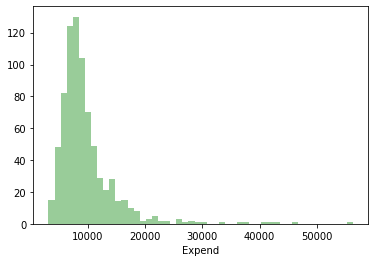

BoxPlot of Expend
----------------------------------------------------------------------------


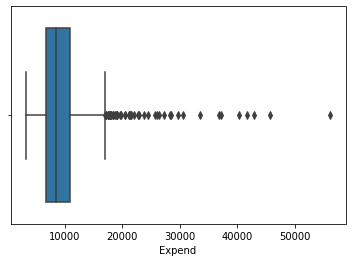

Description of Grad.Rate
----------------------------------------------------------------------------
count    777.00000
mean      65.46332
std       17.17771
min       10.00000
25%       53.00000
50%       65.00000
75%       78.00000
max      118.00000
Name: Grad.Rate, dtype: float64 
----------------------------------------------------------------------------
Distribution of Grad.Rate
----------------------------------------------------------------------------


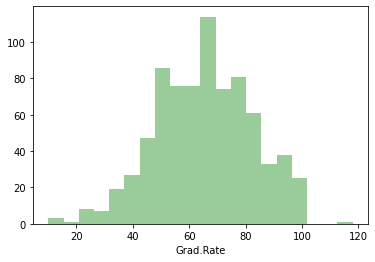

BoxPlot of Grad.Rate
----------------------------------------------------------------------------


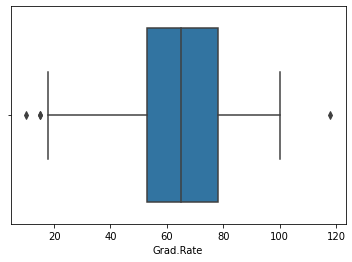

In [14]:
for x in Numeric_columns:
    univariateAnalysis(x,10)

#### Multivariate Analysis 

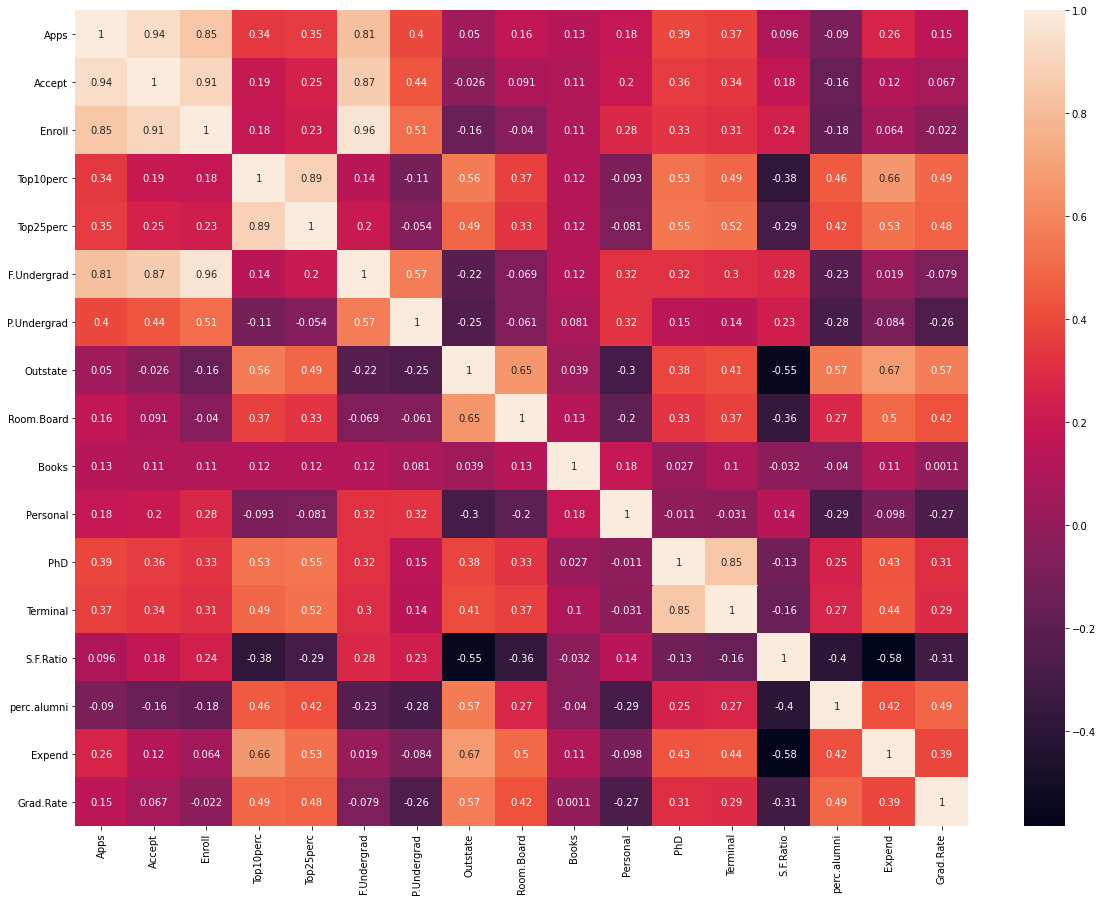

In [60]:
plt.subplots(figsize=(20,15))
sns.heatmap(Educationdata.corr(),annot=True);

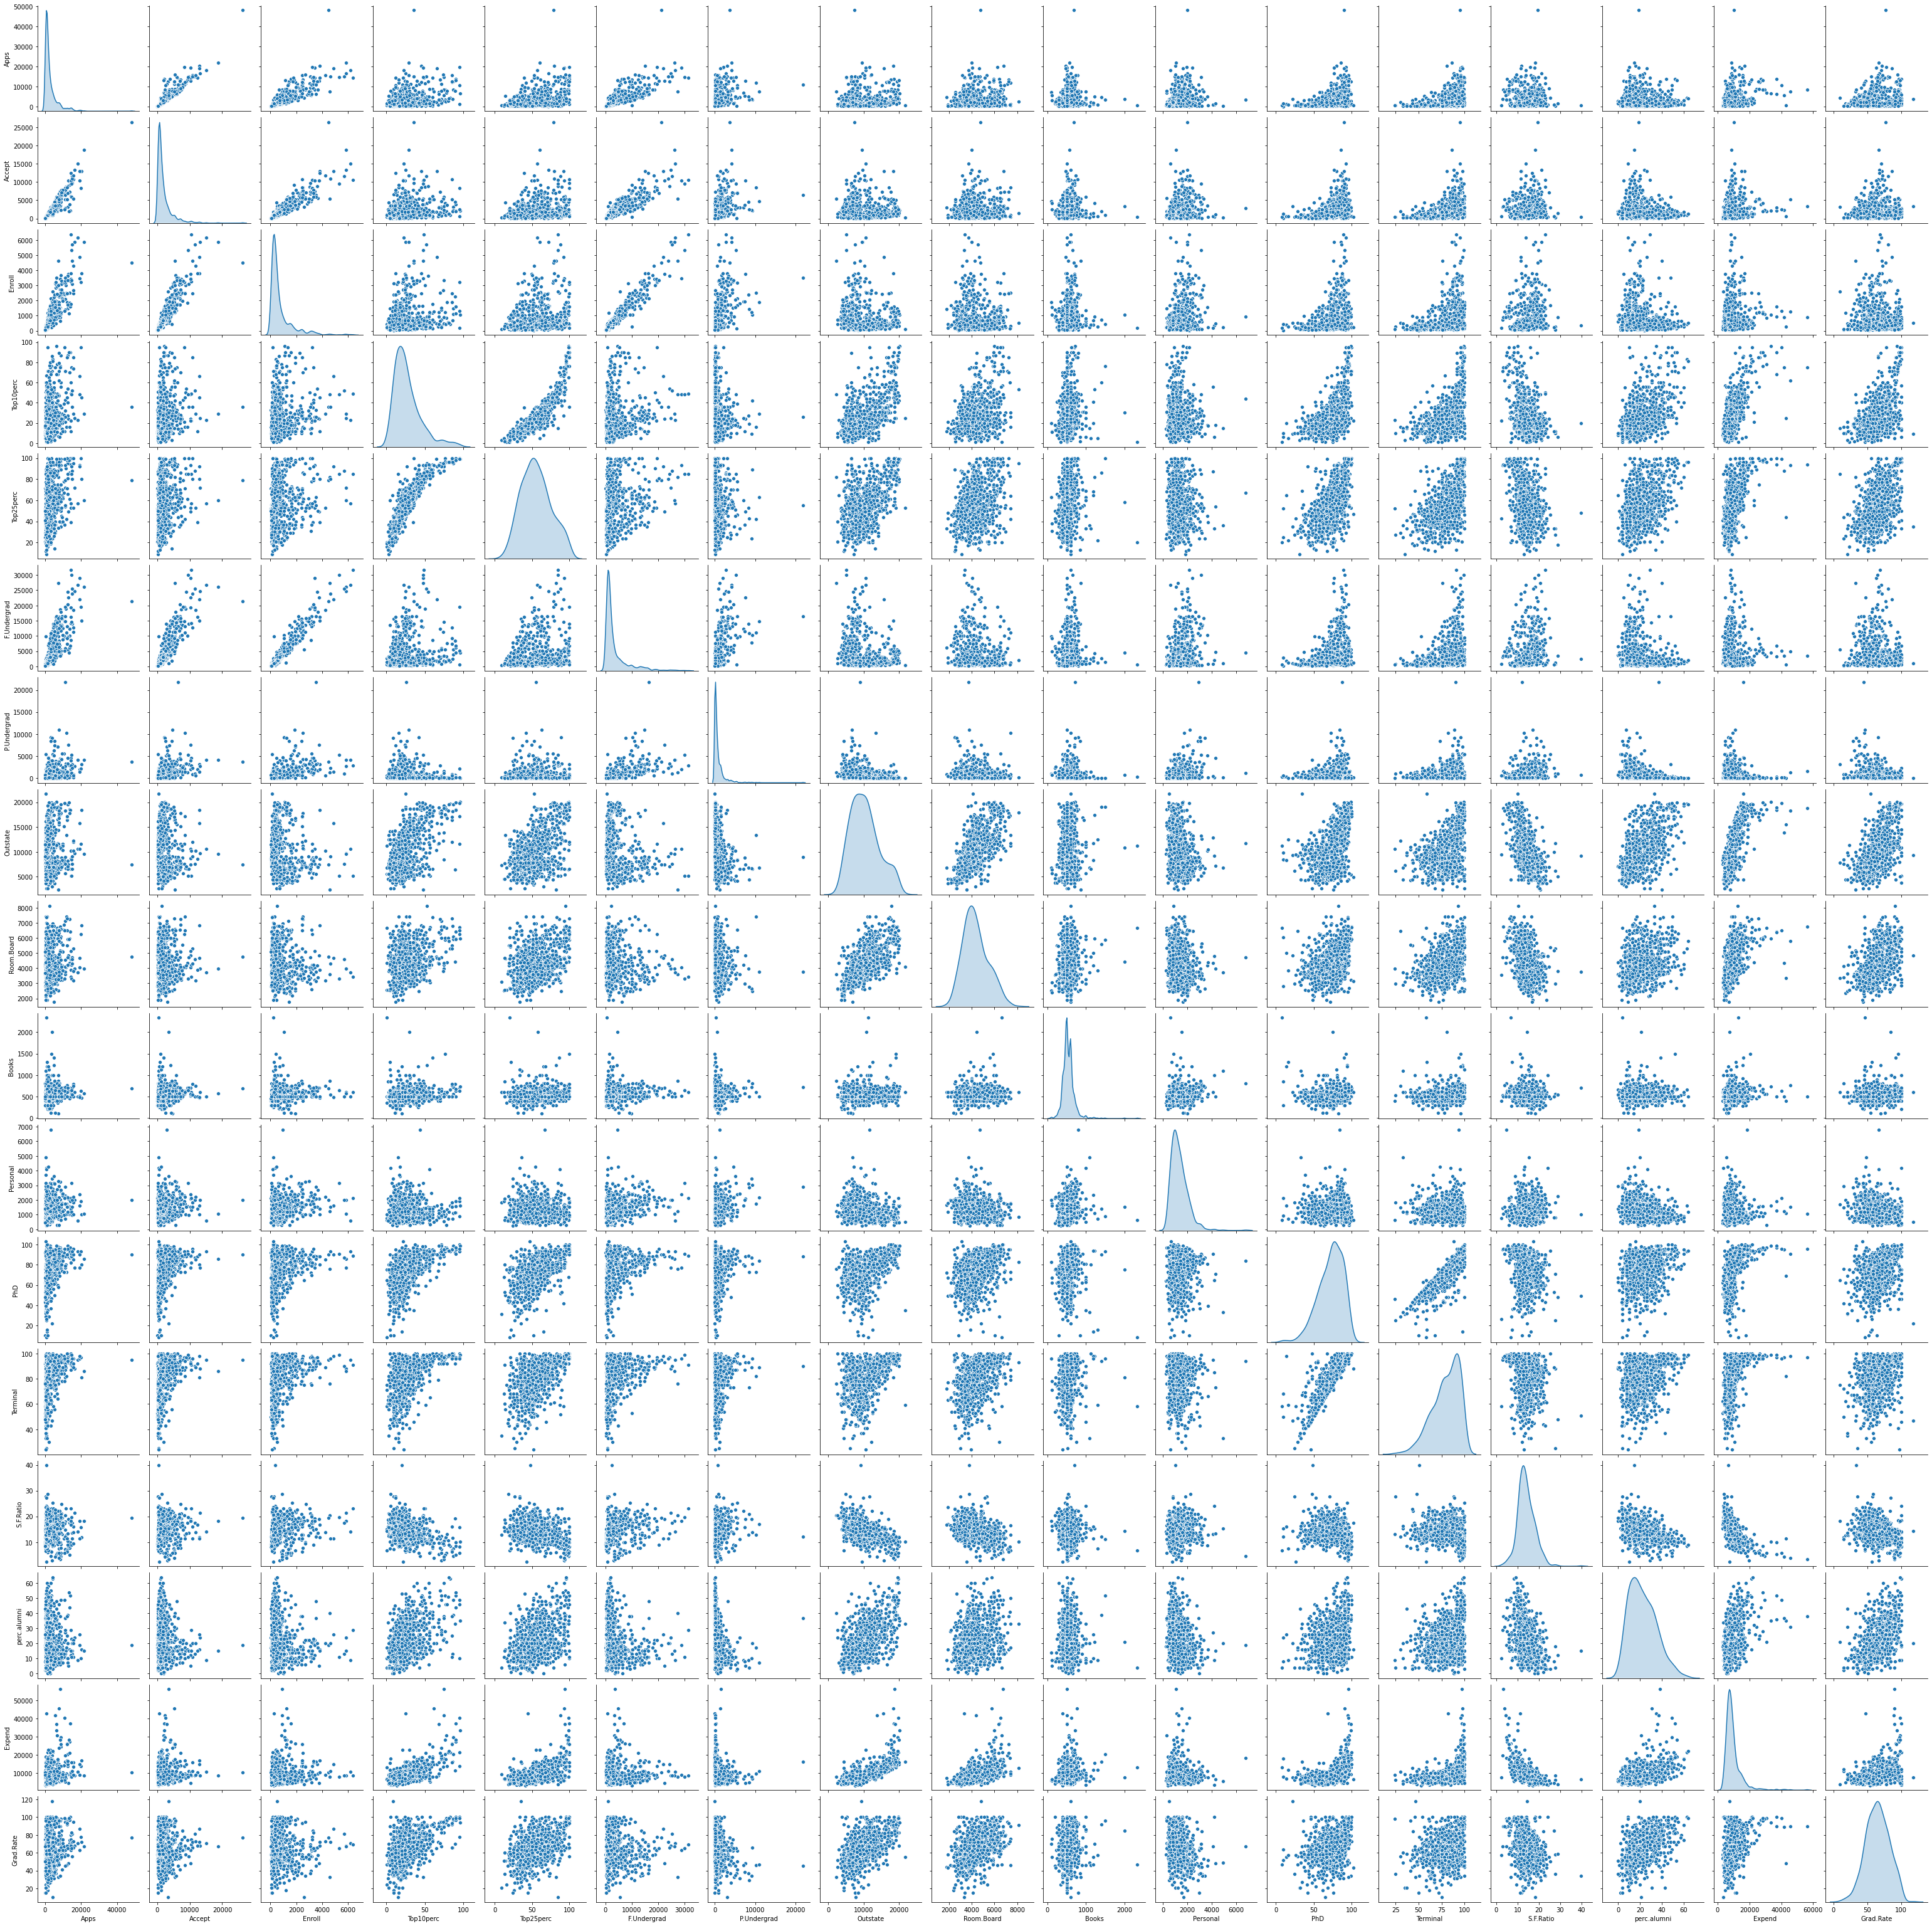

In [15]:
sns.pairplot(Educationdata,diag_kind='kde');

##### Insights:
#####  The average (mean) number of applications received by the listed universities is around 3,001
#####  The number of applications accepted ranges from 72 to 26,330
#####  Average student enrolment is around ~880
#####  Median of new students from top 10% of higher secondary class is 23%
#####  Average book cost is around 550
#####  The minimum S.F. ratio is around 2.5
#####  Average percentage of faculties with Ph.D.’s is 72.6
#####  There are considerable number of variables that are highly correlated
#####  “Apps” has high correlation with “Accept”, and ”Enroll”

##### <span style="color:red">2.2   Is scaling necessary for PCA in this case? Give justification and perform scaling.</span>

##### Yes, it is necessary to perform scaling for PCA. For instance, in given data set, applications and other variables are having values in thousands and few variables such as percentile is in just two digits. So, the data in these variables are of different scales, it is tough to compare these variables.
##### The PCA calculates a new projection of the given data set and the new axis are based on the standard deviation of the variables. So a variable with a high standard deviation in the data set will have a higher weight for the calculation of axis than a variable with a low standard deviation. By performing scaling, we can easily compare these variables.

In [16]:
Educationdata_scaled = Educationdata_numeric.apply(zscore)
Educationdata_scaled.head()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0 -0.346882 -0.321205 -0.063509  -0.258583  -0.191827    -0.168116   
1 -0.210884 -0.038703 -0.288584  -0.655656  -1.353911    -0.209788   
2 -0.406866 -0.376318 -0.478121  -0.315307  -0.292878    -0.549565   
3 -0.668261 -0.681682 -0.692427   1.840231   1.677612    -0.658079   
4 -0.726176 -0.764555 -0.780735  -0.655656  -0.596031    -0.711924   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0    -0.209207 -0.746356   -0.964905 -0.602312  1.270045 -0.163028 -0.115729   
1     0.244307  0.457496    1.909208  1.215880  0.235515 -2.675646 -3.378176   
2    -0.497090  0.201305   -0.554317 -0.905344 -0.259582 -1.204845 -0.931341   
3    -0.520752  0.626633    0.996791 -0.602312 -0.688173  1.185206  1.175657   
4     0.009005 -0.716508   -0.216723  1.518912  0.235515  0.204672 -0.523535   

   S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0   1.013776    -0.867574 -0.501910  -0.318252  
1  -0.477704    -0.544572  0.166110  -0.551262  
2  -0.300749     0.585935 -0.177290  -0.667767  
3  -1.615274     1.151188  1.792851  -0.376504  
4  -0.553542    -1.675079  0.241803  -2.939613

##### Only for numerical variables, if the data on different scale, it’s hard to compare the variables. Here, used the Feature scaling method to standardize the range of features of the data. The range of values of data might be vary widely, so it is necessary step to do data pre-processing.
##### Here, convert variables with different scales of measurements into a single scale. Importing Z-Score from scipy.stats, thus normalizes the data by using the formula (X-Mean)/ (standard deviation). It returns Z-Score for every attributes.
##### If we look at the variables now, 'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc','F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books','Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend','Grad.Rate' all has been normalized and scaled in one scale now.

##### <span style="color:red">2.3   Comment on the comparison between the covariance and the correlation matrices from this data.</span>

##### Without scaling the correlation matrix

In [17]:
Educationdata_numeric.corr()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.000000  0.943451  0.846822   0.338834   0.351640     0.814491   
Accept       0.943451  1.000000  0.911637   0.192447   0.247476     0.874223   
Enroll       0.846822  0.911637  1.000000   0.181294   0.226745     0.964640   
Top10perc    0.338834  0.192447  0.181294   1.000000   0.891995     0.141289   
Top25perc    0.351640  0.247476  0.226745   0.891995   1.000000     0.199445   
F.Undergrad  0.814491  0.874223  0.964640   0.141289   0.199445     1.000000   
P.Undergrad  0.398264  0.441271  0.513069  -0.105356  -0.053577     0.570512   
Outstate     0.050159 -0.025755 -0.155477   0.562331   0.489394    -0.215742   
Room.Board   0.164939  0.090899 -0.040232   0.371480   0.331490    -0.068890   
Books        0.132559  0.113525  0.112711   0.118858   0.115527     0.115550   
Personal     0.178731  0.200989  0.280929  -0.093316  -0.080810     0.317200   
PhD          0.390697  0.355758  0.331469   0.531828   0.545862     0.318337   
Terminal     0.369491  0.337583  0.308274   0.491135   0.524749     0.300019   
S.F.Ratio    0.095633  0.176229  0.237271  -0.384875  -0.294629     0.279703   
perc.alumni -0.090226 -0.159990 -0.180794   0.455485   0.417864    -0.229462   
Expend       0.259592  0.124717  0.064169   0.660913   0.527447     0.018652   
Grad.Rate    0.146755  0.067313 -0.022341   0.494989   0.477281    -0.078773   

             P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  \
Apps            0.398264  0.050159    0.164939  0.132559  0.178731  0.390697   
Accept          0.441271 -0.025755    0.090899  0.113525  0.200989  0.355758   
Enroll          0.513069 -0.155477   -0.040232  0.112711  0.280929  0.331469   
Top10perc      -0.105356  0.562331    0.371480  0.118858 -0.093316  0.531828   
Top25perc      -0.053577  0.489394    0.331490  0.115527 -0.080810  0.545862   
F.Undergrad     0.570512 -0.215742   -0.068890  0.115550  0.317200  0.318337   
P.Undergrad     1.000000 -0.253512   -0.061326  0.081200  0.319882  0.149114   
Outstate       -0.253512  1.000000    0.654256  0.038855 -0.299087  0.382982   
Room.Board     -0.061326  0.654256    1.000000  0.127963 -0.199428  0.329202   
Books           0.081200  0.038855    0.127963  1.000000  0.179295  0.026906   
Personal        0.319882 -0.299087   -0.199428  0.179295  1.000000 -0.010936   
PhD             0.149114  0.382982    0.329202  0.026906 -0.010936  1.000000   
Terminal        0.141904  0.407983    0.374540  0.099955 -0.030613  0.849587   
S.F.Ratio       0.232531 -0.554821   -0.362628 -0.031929  0.136345 -0.130530   
perc.alumni    -0.280792  0.566262    0.272363 -0.040208 -0.285968  0.249009   
Expend         -0.083568  0.672779    0.501739  0.112409 -0.097892  0.432762   
Grad.Rate      -0.257001  0.571290    0.424942  0.001061 -0.269344  0.305038   

             Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
Apps         0.369491   0.095633    -0.090226  0.259592   0.146755  
Accept       0.337583   0.176229    -0.159990  0.124717   0.067313  
Enroll       0.308274   0.237271    -0.180794  0.064169  -0.022341  
Top10perc    0.491135  -0.384875     0.455485  0.660913   0.494989  
Top25perc    0.524749  -0.294629     0.417864  0.527447   0.477281  
F.Undergrad  0.300019   0.279703    -0.229462  0.018652  -0.078773  
P.Undergrad  0.141904   0.232531    -0.280792 -0.083568  -0.257001  
Outstate     0.407983  -0.554821     0.566262  0.672779   0.571290  
Room.Board   0.374540  -0.362628     0.272363  0.501739   0.424942  
Books        0.099955  -0.031929    -0.040208  0.112409   0.001061  
Personal    -0.030613   0.136345    -0.285968 -0.097892  -0.269344  
PhD          0.849587  -0.130530     0.249009  0.432762   0.305038  
Terminal     1.000000  -0.160104     0.267130  0.438799   0.289527  
S.F.Ratio   -0.160104   1.000000    -0.402929 -0.583832  -0.306710  
perc.alumni  0.267130  -0.402929     1.000000  0.417712   0.490898  
Expend       0.438799  -0.58383

##### After scaling the correlation matrix

In [18]:
Educationdata_scaled.corr()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.000000  0.943451  0.846822   0.338834   0.351640     0.814491   
Accept       0.943451  1.000000  0.911637   0.192447   0.247476     0.874223   
Enroll       0.846822  0.911637  1.000000   0.181294   0.226745     0.964640   
Top10perc    0.338834  0.192447  0.181294   1.000000   0.891995     0.141289   
Top25perc    0.351640  0.247476  0.226745   0.891995   1.000000     0.199445   
F.Undergrad  0.814491  0.874223  0.964640   0.141289   0.199445     1.000000   
P.Undergrad  0.398264  0.441271  0.513069  -0.105356  -0.053577     0.570512   
Outstate     0.050159 -0.025755 -0.155477   0.562331   0.489394    -0.215742   
Room.Board   0.164939  0.090899 -0.040232   0.371480   0.331490    -0.068890   
Books        0.132559  0.113525  0.112711   0.118858   0.115527     0.115550   
Personal     0.178731  0.200989  0.280929  -0.093316  -0.080810     0.317200   
PhD          0.390697  0.355758  0.331469   0.531828   0.545862     0.318337   
Terminal     0.369491  0.337583  0.308274   0.491135   0.524749     0.300019   
S.F.Ratio    0.095633  0.176229  0.237271  -0.384875  -0.294629     0.279703   
perc.alumni -0.090226 -0.159990 -0.180794   0.455485   0.417864    -0.229462   
Expend       0.259592  0.124717  0.064169   0.660913   0.527447     0.018652   
Grad.Rate    0.146755  0.067313 -0.022341   0.494989   0.477281    -0.078773   

             P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  \
Apps            0.398264  0.050159    0.164939  0.132559  0.178731  0.390697   
Accept          0.441271 -0.025755    0.090899  0.113525  0.200989  0.355758   
Enroll          0.513069 -0.155477   -0.040232  0.112711  0.280929  0.331469   
Top10perc      -0.105356  0.562331    0.371480  0.118858 -0.093316  0.531828   
Top25perc      -0.053577  0.489394    0.331490  0.115527 -0.080810  0.545862   
F.Undergrad     0.570512 -0.215742   -0.068890  0.115550  0.317200  0.318337   
P.Undergrad     1.000000 -0.253512   -0.061326  0.081200  0.319882  0.149114   
Outstate       -0.253512  1.000000    0.654256  0.038855 -0.299087  0.382982   
Room.Board     -0.061326  0.654256    1.000000  0.127963 -0.199428  0.329202   
Books           0.081200  0.038855    0.127963  1.000000  0.179295  0.026906   
Personal        0.319882 -0.299087   -0.199428  0.179295  1.000000 -0.010936   
PhD             0.149114  0.382982    0.329202  0.026906 -0.010936  1.000000   
Terminal        0.141904  0.407983    0.374540  0.099955 -0.030613  0.849587   
S.F.Ratio       0.232531 -0.554821   -0.362628 -0.031929  0.136345 -0.130530   
perc.alumni    -0.280792  0.566262    0.272363 -0.040208 -0.285968  0.249009   
Expend         -0.083568  0.672779    0.501739  0.112409 -0.097892  0.432762   
Grad.Rate      -0.257001  0.571290    0.424942  0.001061 -0.269344  0.305038   

             Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
Apps         0.369491   0.095633    -0.090226  0.259592   0.146755  
Accept       0.337583   0.176229    -0.159990  0.124717   0.067313  
Enroll       0.308274   0.237271    -0.180794  0.064169  -0.022341  
Top10perc    0.491135  -0.384875     0.455485  0.660913   0.494989  
Top25perc    0.524749  -0.294629     0.417864  0.527447   0.477281  
F.Undergrad  0.300019   0.279703    -0.229462  0.018652  -0.078773  
P.Undergrad  0.141904   0.232531    -0.280792 -0.083568  -0.257001  
Outstate     0.407983  -0.554821     0.566262  0.672779   0.571290  
Room.Board   0.374540  -0.362628     0.272363  0.501739   0.424942  
Books        0.099955  -0.031929    -0.040208  0.112409   0.001061  
Personal    -0.030613   0.136345    -0.285968 -0.097892  -0.269344  
PhD          0.849587  -0.130530     0.249009  0.432762   0.305038  
Terminal     1.000000  -0.160104     0.267130  0.438799   0.289527  
S.F.Ratio   -0.160104   1.000000    -0.402929 -0.583832  -0.306710  
perc.alumni  0.267130  -0.402929     1.000000  0.417712   0.490898  
Expend       0.438799  -0.58383

##### Covariance tells us the direction of the linear relationship between two variables. Correlation indicates the measures of both the strength and direction of the linear relationship between two variables. Correlation is function of the covariance. We can find the correlation coefficient of two variables by dividing the covariance of these variables by the product of the standard deviations of the same values.  Now without Scaling let’s check out correlation matrix and after scaling also
 ##### correlation matrix yields the same result.

##### <span style="color:red">2.4   Check the dataset for outliers before and after scaling. What insight do you derive here?</span>

##### Checking Outliers before scaling 

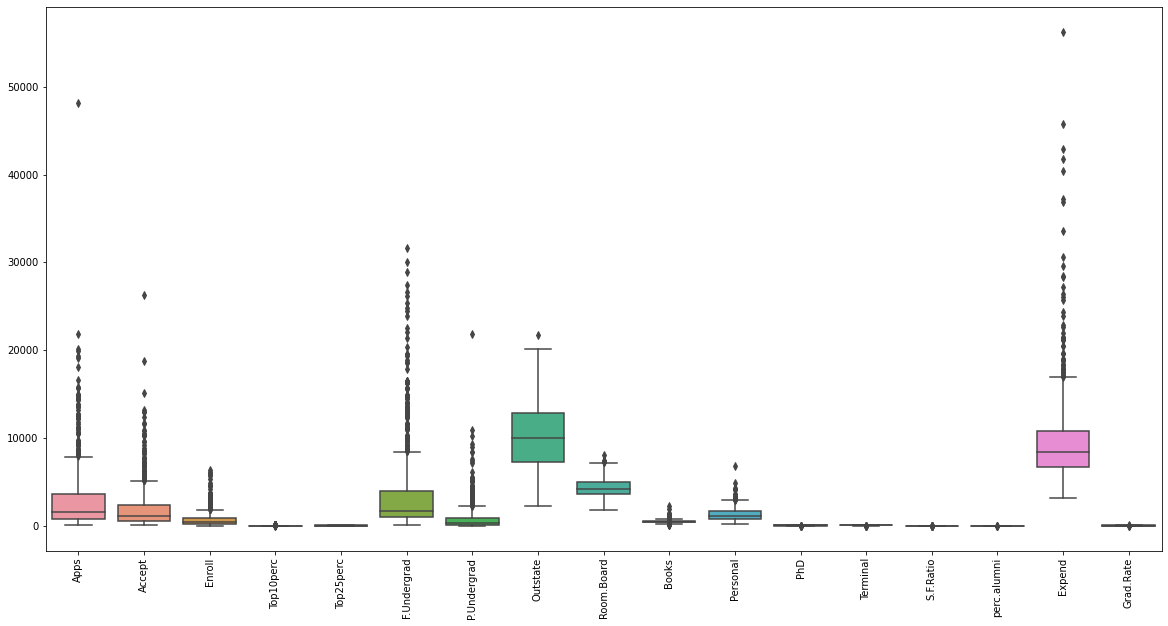

In [19]:
# Before scaling
plt.figure(figsize=(20,10))
sns.boxplot(data =Educationdata_numeric );
plt.xticks(rotation=90);

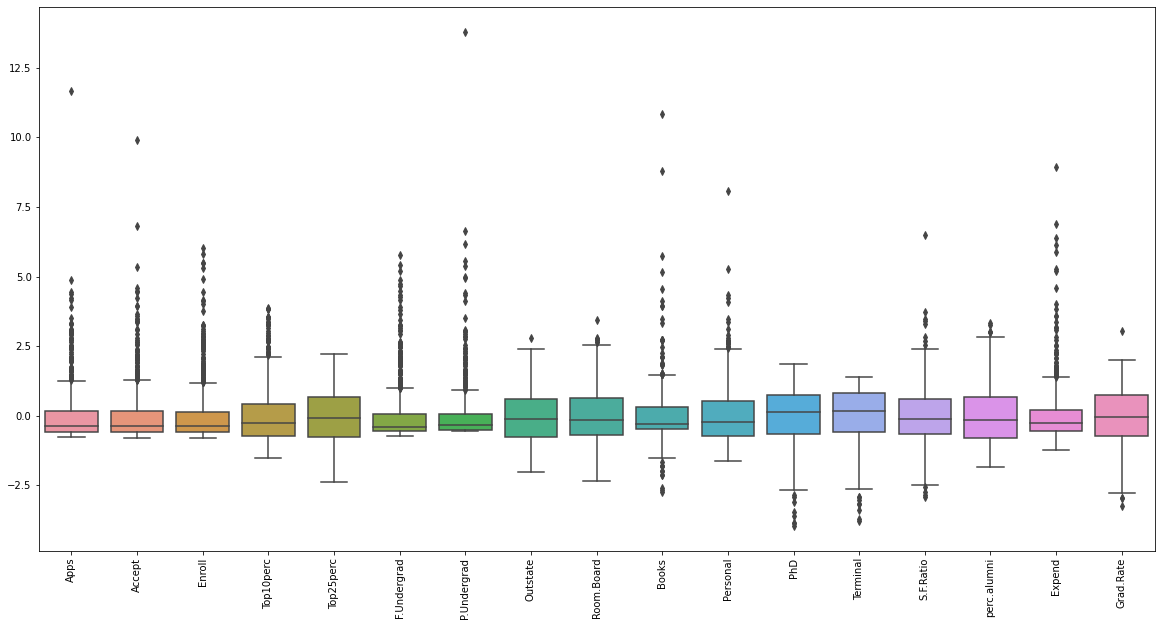

In [20]:
# After scaling
plt.figure(figsize=(20,10))
sns.boxplot(data =Educationdata_scaled );
plt.xticks(rotation=90);

##### Insights:
##### 1. By scaling, all variables have the same standard deviation, thus all variables have the same weight and thus resulting in PCA calculating relevant axis.
##### 2. Before scaling, we only had one variable with no outliers (top25 perc); Post scaling, we have multiple variables with negligible outliers – this is achieved by normalizing the scale of the variables

##### <span style="color:red">2.5   Perform PCA and export the data of the Principal Component scores into a data frame.</span>

##### For performing PCA, we need to follow below steps:
##### Step 1: Generate the covariance matrix
##### Step 2: Get eigenvalues and eigenvector
##### Step 3: View Scree Plot to identify the number of components to be built
##### Step 4: We can perform PCA on the scaled data set by importing PCA from sklearn.decomposition.

In [41]:
from sklearn.decomposition import PCA

# NOTE - we are generating only 8 PCA dimensions as its covering over ~90% data

pca = PCA(n_components=8)
data_reduced = pca.fit_transform(Educationdata_scaled)
data_reduced.transpose()

array([[-1.59285540e+00, -2.19240180e+00, -1.43096371e+00, ...,
        -7.32560596e-01,  7.91932735e+00, -4.69508066e-01],
       [ 7.67333510e-01, -5.78829984e-01, -1.09281889e+00, ...,
        -7.72352397e-02, -2.06832886e+00,  3.66660943e-01],
       [-1.01073537e-01,  2.27879812e+00, -4.38092811e-01, ...,
        -4.05641899e-04,  2.07356368e+00, -1.32891515e+00],
       ...,
       [-2.98306081e-01, -1.77137309e-01, -9.60591689e-01, ...,
         4.68014248e-01, -2.06993738e+00,  8.39893087e-01],
       [ 6.38443468e-01,  2.36753302e-01, -2.48276091e-01, ...,
        -1.31749158e+00,  8.33276555e-02,  1.30731260e+00],
       [-8.79386137e-01,  4.69253269e-02,  3.08740489e-01, ...,
        -1.28288447e-01, -5.52585842e-01,  6.27409633e-01]])

##### Then, we can do loading of each feature on the components

In [39]:
pca.components_

array([[ 0.2487656 ,  0.2076015 ,  0.17630359,  0.35427395,  0.34400128,
         0.15464096,  0.0264425 ,  0.29473642,  0.24903045,  0.06475752,
        -0.04252854,  0.31831287,  0.31705602, -0.17695789,  0.20508237,
         0.31890875,  0.25231565],
       [ 0.33159823,  0.37211675,  0.40372425, -0.08241182, -0.04477866,
         0.41767377,  0.31508783, -0.24964352, -0.13780888,  0.05634184,
         0.21992922,  0.05831132,  0.04642945,  0.24666528, -0.24659527,
        -0.13168986, -0.16924053],
       [-0.0630921 , -0.10124906, -0.08298557,  0.03505553, -0.02414794,
        -0.06139298,  0.13968172,  0.04659887,  0.14896739,  0.67741165,
         0.49972112, -0.12702837, -0.06603755, -0.2898484 , -0.14698927,
         0.22674398, -0.20806465],
       [ 0.28131053,  0.26781735,  0.16182677, -0.05154725, -0.10976654,
         0.10041234, -0.15855849,  0.13129136,  0.18499599,  0.08708922,
        -0.23071057, -0.53472483, -0.51944302, -0.16118949,  0.01731422,
         0.07927349

##### Post that, we can load these components into a dataframe along with the list of columns 

In [40]:
Educationdata_pca_comp = pd.DataFrame(pca.components_,columns=list(Educationdata_scaled))
Educationdata_pca_comp.head()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0  0.248766  0.207602  0.176304   0.354274   0.344001     0.154641   
1  0.331598  0.372117  0.403724  -0.082412  -0.044779     0.417674   
2 -0.063092 -0.101249 -0.082986   0.035056  -0.024148    -0.061393   
3  0.281311  0.267817  0.161827  -0.051547  -0.109767     0.100412   
4  0.005741  0.055786 -0.055694  -0.395434  -0.426534    -0.043454   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0     0.026443  0.294736    0.249030  0.064758 -0.042529  0.318313  0.317056   
1     0.315088 -0.249644   -0.137809  0.056342  0.219929  0.058311  0.046429   
2     0.139682  0.046599    0.148967  0.677412  0.499721 -0.127028 -0.066038   
3    -0.158558  0.131291    0.184996  0.087089 -0.230711 -0.534725 -0.519443   
4     0.302385  0.222532    0.560919 -0.127289 -0.222311  0.140166  0.204720   

   S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0  -0.176958     0.205082  0.318909   0.252316  
1   0.246665    -0.246595 -0.131690  -0.169241  
2  -0.289848    -0.146989  0.226744  -0.208065  
3  -0.161189     0.017314  0.079273   0.269129  
4  -0.079388    -0.216297  0.075958  -0.109268

##### Above is the representative screenshot of Educationdata_pca_comp in which we had exported the principal component scores into a data frame.

##### <span style="color:red">2.6   Extract the eigenvalues, and eigenvectors.</span>

##### We can extract the above represented eigenvalues and eigenvectors using covariance matrix.

In [24]:
# create covariance matrix
cov_matrix = np.cov(Educationdata_scaled.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00128866  0.94466636  0.84791332  0.33927032  0.35209304  0.81554018
   0.3987775   0.05022367  0.16515151  0.13272942  0.17896117  0.39120081
   0.36996762  0.09575627 -0.09034216  0.2599265   0.14694372]
 [ 0.94466636  1.00128866  0.91281145  0.19269493  0.24779465  0.87534985
   0.44183938 -0.02578774  0.09101577  0.11367165  0.20124767  0.35621633
   0.3380184   0.17645611 -0.16019604  0.12487773  0.06739929]
 [ 0.84791332  0.91281145  1.00128866  0.18152715  0.2270373   0.96588274
   0.51372977 -0.1556777  -0.04028353  0.11285614  0.28129148  0.33189629
   0.30867133  0.23757707 -0.18102711  0.06425192 -0.02236983]
 [ 0.33927032  0.19269493  0.18152715  1.00128866  0.89314445  0.1414708
  -0.10549205  0.5630552   0.37195909  0.1190116  -0.09343665  0.53251337
   0.49176793 -0.38537048  0.45607223  0.6617651   0.49562711]
 [ 0.35209304  0.24779465  0.2270373   0.89314445  1.00128866  0.19970167
  -0.05364569  0.49002449  0.33191707  0.115676   -0.08091441

In [25]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors :\n\n', eig_vecs)
print('\n Eigen Values :\n\n', eig_vals)

Eigen Vectors :

 [[-2.48765602e-01  3.31598227e-01  6.30921033e-02 -2.81310530e-01
   5.74140964e-03  1.62374420e-02  4.24863486e-02  1.03090398e-01
   9.02270802e-02 -5.25098025e-02  3.58970400e-01 -4.59139498e-01
   4.30462074e-02 -1.33405806e-01  8.06328039e-02 -5.95830975e-01
   2.40709086e-02]
 [-2.07601502e-01  3.72116750e-01  1.01249056e-01 -2.67817346e-01
   5.57860920e-02 -7.53468452e-03  1.29497196e-02  5.62709623e-02
   1.77864814e-01 -4.11400844e-02 -5.43427250e-01  5.18568789e-01
  -5.84055850e-02  1.45497511e-01  3.34674281e-02 -2.92642398e-01
  -1.45102446e-01]
 [-1.76303592e-01  4.03724252e-01  8.29855709e-02 -1.61826771e-01
  -5.56936353e-02  4.25579803e-02  2.76928937e-02 -5.86623552e-02
   1.28560713e-01 -3.44879147e-02  6.09651110e-01  4.04318439e-01
  -6.93988831e-02 -2.95896092e-02 -8.56967180e-02  4.44638207e-01
   1.11431545e-02]
 [-3.54273947e-01 -8.24118211e-02 -3.50555339e-02  5.15472524e-02
  -3.95434345e-01  5.26927980e-02  1.61332069e-01  1.22678028e-01
 

##### Above are the values of Eigen Vectors & Eigen Value

##### <span style="color:red">2.7   Write down the explicit form of the first PC (in terms of the eigenvectors. Use values with two places of decimals only).</span>

#####  First PC in terms of Eigen Vector : eig_vecs[0]

In [27]:
eig_vecs[0]

array([-0.2487656 ,  0.33159823,  0.0630921 , -0.28131053,  0.00574141,
        0.01623744,  0.04248635,  0.1030904 ,  0.09022708, -0.0525098 ,
        0.3589704 , -0.4591395 ,  0.04304621, -0.13340581,  0.0806328 ,
       -0.59583097,  0.02407091])

In [34]:
# Displaying the values with two places of decimals only (As asked in question)

First_PC_with_two_decimal_places = [round(num, 2) for num in eig_vecs[0]]
First_PC_with_two_decimal_places

[-0.25,
 0.33,
 0.06,
 -0.28,
 0.01,
 0.02,
 0.04,
 0.1,
 0.09,
 -0.05,
 0.36,
 -0.46,
 0.04,
 -0.13,
 0.08,
 -0.6,
 0.02]

##### If we sort the eigenvectors in descending order with respect to their eigenvalues, we will have that the first eigenvector accounts for the largest spread among data, the second one for the second largest spread and so on.

##### <span style="color:red">2.8   Consider the cumulative values of the eigenvalues. How does it help you to decide on the optimum number of principal components? What do the eigenvectors indicate?</span>

In [37]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance :", cum_var_exp)

Cumulative Variance Explained [ 32.0206282   58.36084263  65.26175919  71.18474841  76.67315352
  81.65785448  85.21672597  88.67034731  91.78758099  94.16277251
  96.00419883  97.30024023  98.28599436  99.13183669  99.64896227
  99.86471628 100.        ]



##### From the above cumulative values of the eigenvalues, we can see that around 8 principal components explained almmost 90% of the variance. Thus, the optimum number of principal components can be 8.

##### Furthermore, eigenvectors indicate the direction of the principal components, we can multiply the original data by the eigenvectors to re-orient our data onto the new axes.

##### <span style="color:red">2.9   Explain the business implication of using the Principal Component Analysis for this case study. How may PCs help in the further analysis? [Hint: Write Interpretations of the Principal Components Obtained]</span>

##### We know that the principal components describe the amount of the total variance that can be explained by a single dimension of the data. As mentioned above, we have generated only 8 PCA dimensions. These 8 PCA can be used for further analysis, representing almost 90% of the variance.

##### In this case study, we had 17 numeric variables to be assessed, with PCA we did dimensionality reduction from 17 to 8 (representing almost 90% of the variance).
##### However, we can see from the above mentioned cumulative variance that even 5 PCA dimensions represent around 80% of the variance. But, to be on a safer side, we have considered to go with 90% variance.
##### Thus, as far as business implication of using PCA is concerned, in this case, we are reducing a high- dimensional space (with 17 variables) and converting it to a lower dimensional space without (theoretically) losing much of the explanatory power.

<AxesSubplot:>

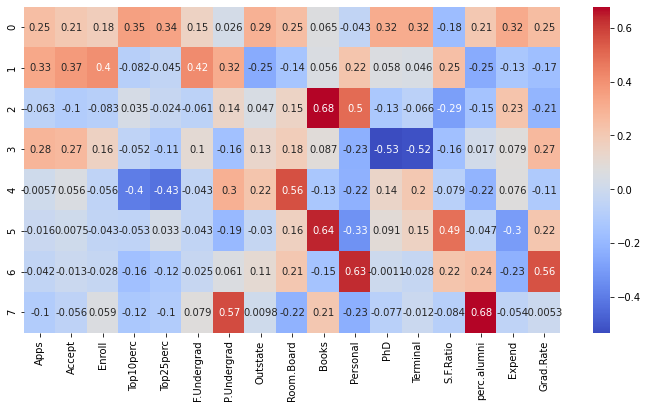

In [47]:
plt.figure(figsize=(12,6))
sns.heatmap(Educationdata_pca_comp,cmap='coolwarm',annot=True)

##### Following are the interpretations from the obtained PCs
#####  PC1: Explains No. of students for whom the particular college or university is Out-of-state tuition and instructional expenditure per student
#####  PC2: Represents the highly correlated variables such as Apps, Enroll and Accept
#####  PC3: Highlights the estimated cost of books for a student
#####  PC4: Represents % of faculties with Ph.D.’s and terminal degree
#####  PC5: Explains percentage of new students from top 10% and 25% of higher secondary class including cost of room and board
#####  PC6: Details about student/faculty ratio
#####  PC7: Highlights estimated personal spending for a student and graduation rate
#####  PC8: Explains number of part-time undergraduate students and alumni who donate